In [12]:
import os
import numpy as np
from tensorflow.keras.models import model_from_json

import matplotlib.pyplot as plt

In [5]:
cwd = '/content/drive/MyDrive/Daylight Autonomy'

In [6]:
# Load CNN model
json_file = open(os.path.join(cwd, 'models/DA_CNN.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
loaded_model.load_weights(os.path.join(cwd, 'models/DA_CNN.h5'))

In [16]:
# test case dictionary. Can be anylist or array as long as the order is correct and is shaped to (1,8)
test_case = {
    'SideA': 4.7,
    'SideB': 8.0,
    'SideC': 6.0,
    'SideD': 9.52,
    'WindowWidth': 2.87,
    'WindowLength': 1.25,
    'Orientation': 45,
    'Area': 45
}

In [34]:
# converting dictionary to 2D vector of size (1,8)
input = np.array(list(test_case.values())).reshape(1,-1)

In [36]:
# predict input array, returns a 4D vector of size (1, 30, 31, 1)
test_pred = loaded_model.predict(input)

In [39]:
test_pred.shape

(1, 30, 31, 1)

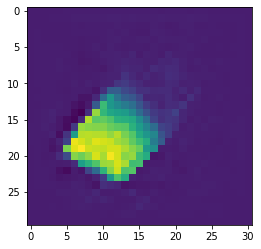

In [41]:
# reshape output to 2D array (30,31) to plot on heatmap
plt.imshow(test_pred.reshape(30,-1));

In [50]:
# reshape to 1D vector for honeybee to recolor mesh
output = test_pred.ravel()